In [71]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import warnings
from scipy.stats import lognorm
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [72]:
# Assuming you have already loaded the CSV data into the 'data' DataFrame
data = pd.read_csv('/Users/uddashyakumar/Desktop/multyfi/NIFTY50.csv')

# Convert the 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

# Filter data for the years 2017 to 2019
start_date = pd.to_datetime('2017-01-01')
end_date = pd.to_datetime('2019-12-31')
filtered_data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]

filtered_data.head(5)


,symbol,datetime,open,high,low,close,volume
0,NIFTY50,2017-07-17 09:15:00,9908.15,9908.50,9900.50,9900.50,0
1,NIFTY50,2017-07-17 09:16:00,9901.90,9905.85,9899.50,9904.35,0
2,NIFTY50,2017-07-17 09:17:00,9904.45,9906.80,9903.30,9903.30,0
3,NIFTY50,2017-07-17 09:18:00,9903.35,9908.90,9903.35,9907.80,0
4,NIFTY50,2017-07-17 09:19:00,9907.00,9911.60,9905.35,9910.15,0


In [73]:

# Select only the 'datetime' and 'close' columns
data = filtered_data[['close']]
data.head(5)


,close
0,9900.50
1,9904.35
2,9903.30
3,9907.80
4,9910.15


In [74]:
# Fit a lognormal distribution to the 'close' data
mu, sigma = np.log(data['close']).mean(), np.log(data['close']).std()
s = np.random.lognormal(mu, sigma, len(data))

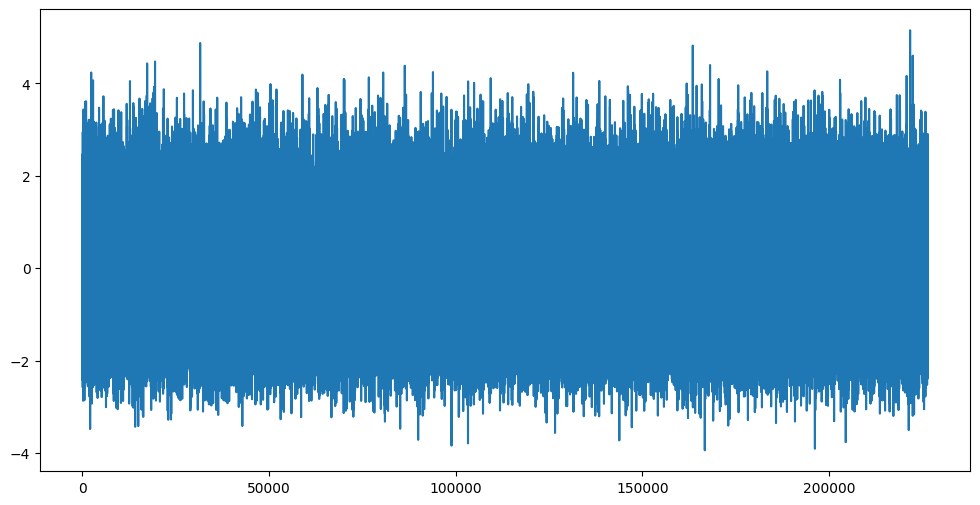

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_for_scaling = s
data_for_scaling = data_for_scaling.reshape(-1, 1)

data_scaled = scaler.fit_transform(data_for_scaling)

data_scaled_df = pd.DataFrame(data_scaled, columns=['log close'])

plt.figure(figsize=(12,6))

plt.plot(data_scaled_df['log close'])

In [76]:
model=KMeans(n_clusters=3,init='k-means++')
model.fit(data_scaled_df)

KMeans(n_clusters=3)

In [77]:
data_scaled_df['Cluster'] = model.predict(data_scaled_df)
data_scaled_df.head(5)

,log close,Cluster
0,0.521679,2
1,0.886420,0
2,-0.263042,2
3,1.353900,0
4,0.291883,2


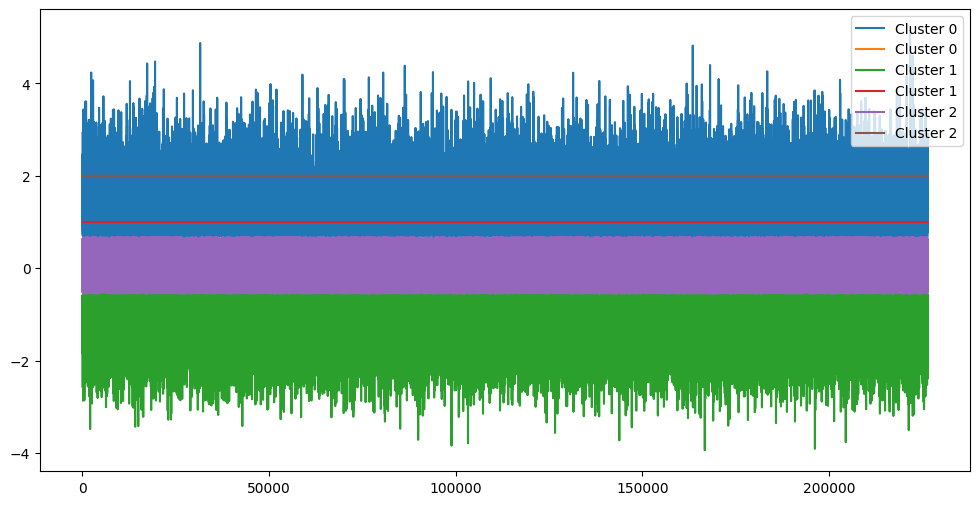

In [78]:
plt.figure(figsize=(12, 6))
for cluster in range(3):
    plt.plot(data_scaled_df[data_scaled_df['Cluster'] == cluster],
                label=f'Cluster {cluster}')
plt.legend()
plt.show()


In [80]:
# Function to predict cluster 
def predict_cluster(closing_price):

  scaled_data = scaler.transform([[closing_price]])

  prediction = model.predict(scaled_data)
  if prediction[0]==0:
    regime='Bearish'
  elif prediction[0]==1:
    regime='Consolidated'
  else:
    regime='Bullish'
  return regime

# Take input
closing_price = float(input("Enter closing price: "))

# Predict cluster
cluster = predict_cluster(closing_price)

# Print result  
print(f"Closing price {closing_price} belongs to cluster:", cluster)

Closing price 10000.0 belongs to cluster: Consolidated
